# Load Data
You can decide below whether to use data already provided or your own data.
To use your own data, run `summed_importances.py` and change the line
`meta = 'run_old'`
to 
`meta = 'run_new'`. 

For the data provided, change the variable `name` below to see a run with full gradients (only 1 task). Default are all 10 tasks without full gradients.

In [11]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['figure.dpi']= 200
%matplotlib inline


name = 'summed_importances_full-grad=True_' #data for first task with full gradient
name ='summed_importances_full-grad=False_' #data for all tasks without full gradient
meta = 'run_old'

with open(name+meta+'.pickle', 'rb') as handle:
    my_dict = pickle.load(handle)
    

## Plot

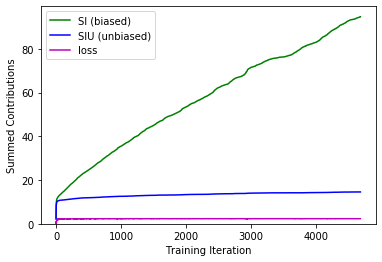

In [12]:
# Choose which task to plot. Any digit which appears in MNIST is fine.
task = 0
#Rest is automatic
sum_b = np.asarray(my_dict['summed_biased'][task])
sum_u = np.asarray(my_dict['summed_unbiased'][task])
sum_f = np.asarray(my_dict['summed_full'][task])
loss = np.asarray(my_dict['loss_hist'][task])
x = np.arange(len(sum_b))

plt.plot(x,sum_b,'g',label='SI (biased)')
plt.plot(x,sum_u,'b',label='SIU (unbiased)')
if name[-5:-1] == 'True':
    steps = 100
    plt.plot(x[::steps],sum_f[::steps],'+r', label='full gradient')
plt.plot(x,loss[0]-loss,'m', label='loss')
plt.xlabel(xlabel=r'Training Iteration')
plt.ylabel('Summed Contributions')
plt.legend(loc="upper left")
plt.ylim(bottom=0)
plt.show()
